In [1]:
import numpy as np

tokenized_data = np.load('toxic_classification_traindata_2.npy')

In [2]:
from gensim import models, corpora
  
# Build a Dictionary - association word to numeric id
dictionary = corpora.Dictionary(tokenized_data)
 
# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus, num_topics=num_topics, passes=50, id2word=dictionary)
        model_list.append(model)
        coherencemodel = models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

unable to import 'smart_open.gcs', disabling that module


In [6]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_data, limit=40, step=6)

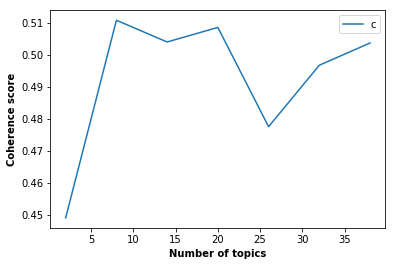

In [7]:
import matplotlib.pyplot as plt

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics", fontweight='bold')
plt.ylabel("Coherence score", fontweight='bold')
plt.legend(("coherence_values"), loc='best')
plt.show()

In [8]:
# Save the LDA model with best coherence score from LDA model

import joblib

lda_model_bcs = model_list[coherence_values.index(max(coherence_values))]
joblib.dump(lda_model_bcs, 'lda_gensim_bcs.jl')

['lda_gensim_bcs.jl']

In [9]:
# Store the topic words in an array

topic_words_bcs = []
for index, topic in lda_model_bcs.show_topics(num_topics=-1, num_words=20, log=False, formatted=False):
    words = [w[0] for w in topic]
    topic_words_bcs.append(words)

In [10]:
# Save the topic words in a text file

with open("lda_topic_words_bcs.txt", "w") as txt_file:
    for line in topic_words_bcs:
        txt_file.write(" ".join(line) + "\n")
txt_file.close()

In [11]:
# Visualizing the model

import pyLDAvis.gensim
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda_model_bcs, corpus, dictionary, sort_topics=False)
panel

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0       5.353426        1       1 -0.183514 -0.098443
1      54.898048        1       2  0.127127 -0.135269
2       8.815740        1       3  0.110186 -0.069624
3       4.811426        1       4 -0.032545  0.389286
4       5.634004        1       5  0.110601  0.045501
5       8.797434        1       6 -0.326527 -0.066637
6       5.199975        1       7  0.058392 -0.019427
7       6.489949        1       8  0.136279 -0.045387, topic_info=      Category         Freq        Term        Total  loglift  logprob
term                                                                  
90     Default  8587.000000        fuck  8587.000000  30.0000  30.0000
2349   Default  2584.000000      nigger  2584.000000  29.0000  29.0000
245    Default  3476.000000   wikipedia  3476.000000  28.0000  28.0000
770    Default  2893.000000        suck  2893.000000  27.0000  27.0000
349    Default  2280.000000        hate  2280.000000  26.0000  26.0000
124    Default  3481.000000        shit  3481.000000  25.0000  25.0000
87     Default  2550.000000         ass  2550.000000  24.0000  24.0000
53     Default  3313.000000     fucking  3313.000000  23.0000  23.0000
473    Default  2346.000000           u  2346.000000  22.0000  22.0000
56     Default  2850.000000          go  2850.000000  21.0000  21.0000
54     Default  1713.000000         gay  1713.000000  20.0000  20.0000
249    Default  2186.000000       youre  2186.000000  19.0000  19.0000
1392   Default  1558.000000      vagina  1558.000000  18.0000  18.0000
537    Default  1819.000000       moron  1819.000000  17.0000  17.0000
257    Default  1442.000000         fat  1442.000000  16.0000  16.0000
119    Default  1753.000000         die  1753.000000  15.0000  15.0000
1199   Default  1321.000000       penis  1321.000000  14.0000  14.0000
290    Default  1586.000000          hi  1586.000000  13.0000  13.0000
127    Default  1700.000000      stupid  1700.000000  12.0000  12.0000
100    Default  2243.000000          im  2243.000000  11.0000  11.0000
139    Default  1623.000000       bitch  1623.000000  10.0000  10.0000
995    Default  1128.000000       sucks  1128.000000   9.0000   9.0000
101    Default  2252.000000        know  2252.000000   8.0000   8.0000
297    Default  1065.000000         jew  1065.000000   7.0000   7.0000
452    Default  1190.000000        wiki  1190.000000   6.0000   6.0000
154    Default  1284.000000        dick  1284.000000   5.0000   5.0000
398    Default  1159.000000        cunt  1159.000000   4.0000   4.0000
18     Default   962.000000         hey   962.000000   3.0000   3.0000
2448   Default   890.000000        aids   890.000000   2.0000   2.0000
27     Default  1568.000000        talk  1568.000000   1.0000   1.0000
...        ...          ...         ...          ...      ...      ...
13368   Topic8   122.629791       licks   123.496620   2.7279  -5.4424
10482   Topic8    97.170395       blank    98.037392   2.7260  -5.6751
7035    Topic8    86.557800      credit    87.425117   2.7249  -5.7907
8438    Topic8    83.112892      cougar    83.979630   2.7245  -5.8314
4032    Topic8    82.903320      indian    83.771187   2.7245  -5.8339
18518   Topic8    80.525154     friggen    81.391930   2.7242  -5.8630
357     Topic8    77.957428       asian    78.824593   2.7239  -5.8954
2672    Topic8    76.532707       games    77.400597   2.7236  -5.9138
1804    Topic8    74.977707      actual    75.845421   2.7234  -5.9344
7356    Topic8    71.006226           v    71.876991   2.7227  -5.9888
3707    Topic8    70.570877     rubbish    71.438240   2.7227  -5.9949
5255    Topic8    69.892326        mods    70.760422   2.7226  -6.0046
762     Topic8    67.861763      puppet    68.728867   2.7222  -6.0341
5376    Topic8    63.381561          la    64.249504   2.7213  -6.1024
203     Topic8   633.751648         old   648.462402   2.7120  -3.7999
3207    T

In [10]:
# Prepare y vector for the document datasets for neural network

import numpy as np

y = []
for doc in corpus:
    x = []
    x = np.pad(x, (0,lda_model.num_topics), 'constant')
    #topic_indices = [i for i,j in lda_model[doc]]
    #for topic_index in topic_indices:
        #x[topic_index] = 1
    topic_indices = [(i,j) for i,j in lda_model.get_document_topics(corpus[0], minimum_probability = 0.0)]
    for topic_index,topic_value in topic_indices:
        x[topic_index] = topic_value
    y.append(x)

In [11]:
print(y[3])

[0.0250447  0.02500346 0.02500346 0.62486124 0.02500346 0.22502759
 0.02500346 0.02505264]


In [12]:
print(lda_model.get_document_topics(corpus[3], minimum_probability = 0.0))

[(0, 0.0022442027), (1, 0.0022465882), (2, 0.07884249), (3, 0.85101527), (4, 0.0022438087), (5, 0.0022440124), (6, 0.058917105), (7, 0.0022465037)]


In [13]:
# Save the y vector in a .npy file

import numpy as np

#np.save('y_lda.npy', y)
np.save('y_realvalue_lda.npy', y)

In [14]:
# loading a model

import joblib

lda_model = joblib.load('lda_gensim_2.jl')